In [42]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  '#373e4b',
    "axes.facecolor": '#373e4b',
})

# Dataset

### $$x = \begin{bmatrix} x_{(1)} \\ \vdots  \\ x_{(m)} \end{bmatrix}$$
### $$y = \begin{bmatrix} y_{(1)}\\ \vdots \\y_{(m)} \end{bmatrix}$$

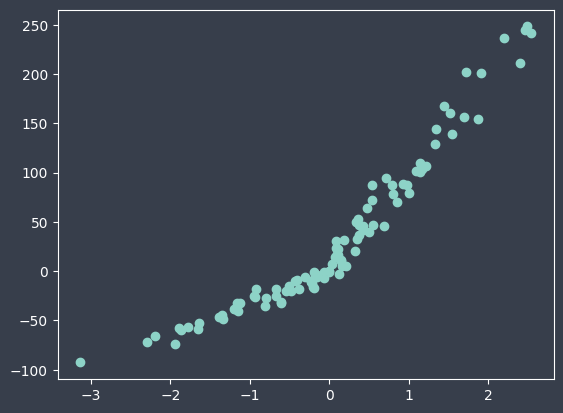

In [43]:
np.random.seed(8)

x, y = make_regression(n_samples=100, n_features=1, noise = 10) # creation d'un dataset (x, y) linéaire
y = y + abs(y/2) # modifie les valeurs de y pour rendre le dataset non-linéaire

plt.scatter(x, y)

In [44]:
# redimensionner y
y = y.reshape(y.shape[0], 1)

print(x.shape)
print(y.shape)

(100, 1)
(100, 1)


# Initialisation

### $$X = \begin{bmatrix} x^{2}_{(1)} & x_{(1)} & 1 \\ ... & ... & ... \\ x^{2}_{(m)} & x_{(m)} & 1 \end{bmatrix}$$

In [45]:
# Création de la matrice X, inclut le Biais
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X)) # ajoute le vecteur x^2 a la gauche de la matrice X

print(X.shape)
print(X[:10])

(100, 3)
[[ 9.36815994e-02 -3.06074500e-01  1.00000000e+00]
 [ 4.79859906e+00 -2.19057049e+00  1.00000000e+00]
 [ 6.47746894e+00  2.54508722e+00  1.00000000e+00]
 [ 1.27101530e-01  3.56513015e-01  1.00000000e+00]
 [ 1.26186310e+00 -1.12332680e+00  1.00000000e+00]
 [ 5.09533507e-01  7.13816158e-01  1.00000000e+00]
 [ 1.35988363e+00  1.16614049e+00  1.00000000e+00]
 [ 4.85761259e-01  6.96965751e-01  1.00000000e+00]
 [ 4.31137061e-03 -6.56610281e-02  1.00000000e+00]
 [ 1.50051786e+00  1.22495627e+00  1.00000000e+00]]


## Fonction Coût

### $$ J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^2 $$

In [46]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((X.dot(theta) - y)**2)

# Exact Solution

### $$\theta=(X^T X)^{-1}X^T Y$$

In [47]:
from numpy.linalg import inv
theta = np.dot(np.dot(inv(np.dot(X.T, X)),X.T), y)

In [48]:
theta

array([[12.30692124],
       [65.32911315],
       [13.40773479]])

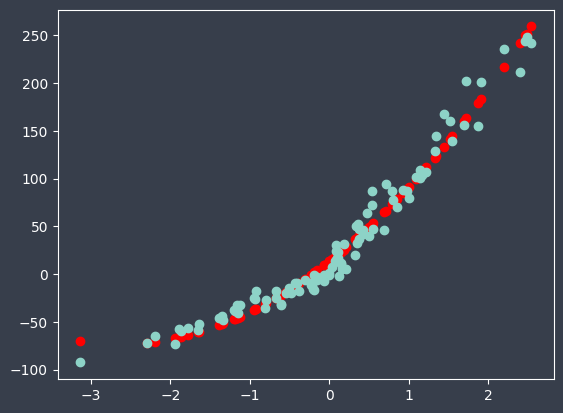

In [49]:
plt.scatter(x,X.dot(theta),c='r')
plt.scatter(x,y)

### Fonction Coût

In [50]:
cost_function(X,y,theta)

85.64327668609953

# Machine Learning

In [51]:
# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
theta = np.random.randn(3, 1)
theta

array([[ 0.49517081],
       [-0.19988089],
       [-2.4711348 ]])

In [52]:
def model(X, theta):
    return X.dot(theta)

In [53]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [54]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [55]:
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [56]:
theta_final # voici les parametres du modele une fois que la machine a été entrainée

array([[12.31266531],
       [65.32940367],
       [13.38840632]])

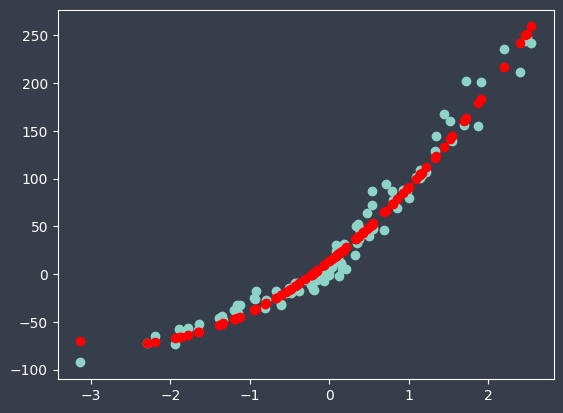

In [57]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.scatter(x, predictions, c='r')

In [58]:
cost_function(X,y,theta_final)

85.64340306860407